<a href="https://colab.research.google.com/github/naveenkumarch/Forest_Fire_Image_Classification/blob/main/code/F_fire_Img_analysis_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')  #change dir
#!mkdir train  #create a directory named train/
#!mkdir test  #create a directory named test/
!unzip -q Training.zip -d train/  #unzip data in train/
#!unzip -q Test.zip -d test/  #unzip data in test/

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import seaborn as sns 

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [34]:
Fire_Train_images_dict = {
    'Fire' : "/content/drive/MyDrive/Colab Notebooks/train/Training/Fire",
    'No_fire' : "/content/drive/MyDrive/Colab Notebooks/train/Training/No_Fire"
}

In [35]:
Fire_labels_dict = {
    'Fire' : 0,
    'No_fire':1
}

In [36]:
X= []
y = []
for dirs,values in Fire_Train_images_dict.items():
    #print(str(dirs))
    print(values)
    for dirname, _, filenames in os.walk(values):
        #print(len(filenames))
        for filename in filenames:
            #print(filename)
            X.append(cv2.imread(str(values+'/'+filename)))
            y.append(Fire_labels_dict[str(dirs)])

/content/drive/MyDrive/Colab Notebooks/train/Training/Fire
/content/drive/MyDrive/Colab Notebooks/train/Training/No_Fire


In [19]:
Fire_Test_images_dict = {
    'Fire' : "/content/drive/MyDrive/Colab Notebooks/test/Test/Fire",
    'No_fire' : "/content/drive/MyDrive/Colab Notebooks/test/Test/No_Fire"
}

In [20]:
X_test= []
y_test = []
for dirs,values in Fire_Test_images_dict.items():
    #print(str(dirs))
    print(values)
    for dirname, _, filenames in os.walk(values):
        #print(len(filenames))
        for filename in filenames:
            #print(filename)
            X_test.append(cv2.imread(str(values+'/'+filename)))
            y_test.append(Fire_labels_dict[str(dirs)])

/content/drive/MyDrive/Colab Notebooks/test/Test/Fire
/content/drive/MyDrive/Colab Notebooks/test/Test/No_Fire


In [37]:
print("Number of Traing Images is : ",len(X))
print("Number of Test Images is : ",len(X_test))

Number of Traing Images is :  39375
Number of Test Images is :  8617


In [38]:
print("Image size and colour space", np.shape(X[0]))

Image size and colour space (254, 254, 3)


Text(0.5, 0, 'Class Labels')

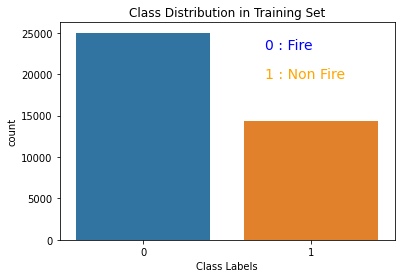

In [39]:
# Plotting distribution of different classes in the training data 
plt.subplot(1,1,1)
sns.countplot(y)
plt.title("Class Distribution in Training Set")
plt.figtext(0.6, 0.8, 
            "0 : Fire", 
            horizontalalignment ="left",  
            verticalalignment ="center",  
            wrap = True, fontsize = 14,  
            color ="blue")
plt.figtext(0.6, 0.7, 
            "1 : Non Fire", 
            horizontalalignment ="left",  
            verticalalignment ="center",  
            wrap = True, fontsize = 14,  
            color ="orange")
plt.xlabel("Class Labels")

Text(0.5, 0, 'Class Labels')

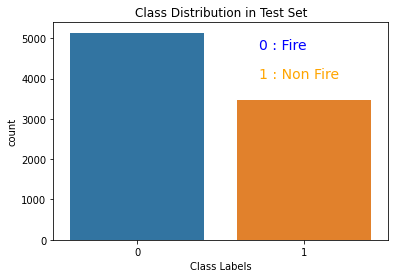

In [40]:
# Plotting distribution of different classes in the test data 
plt.subplot(1,1,1)
fig = sns.countplot(y_test)
plt.title("Class Distribution in Test Set")
plt.figtext(0.6, 0.8, 
            "0 : Fire", 
            horizontalalignment ="left",  
            verticalalignment ="center",  
            wrap = True, fontsize = 14,  
            color ="blue")
plt.figtext(0.6, 0.7, 
            "1 : Non Fire", 
            horizontalalignment ="left",  
            verticalalignment ="center",  
            wrap = True, fontsize = 14,  
            color ="orange")
plt.xlabel("Class Labels")

In [41]:
y = np.array(y)
Train_NF_labels = np.where(y == 1)
print("No of train samples for Non fire images", len(Train_NF_labels[0]))
Train_F_labels = np.where(y == 0)
print("No of test samples for fire images",len(Train_F_labels[0]))

No of train samples for Non fire images 14357
No of test samples for fire images 25018


In [42]:
# Selecting 9 Non fire image samples at random
idx = np.random.choice(len(Train_NF_labels[0]), size=9, replace=False)

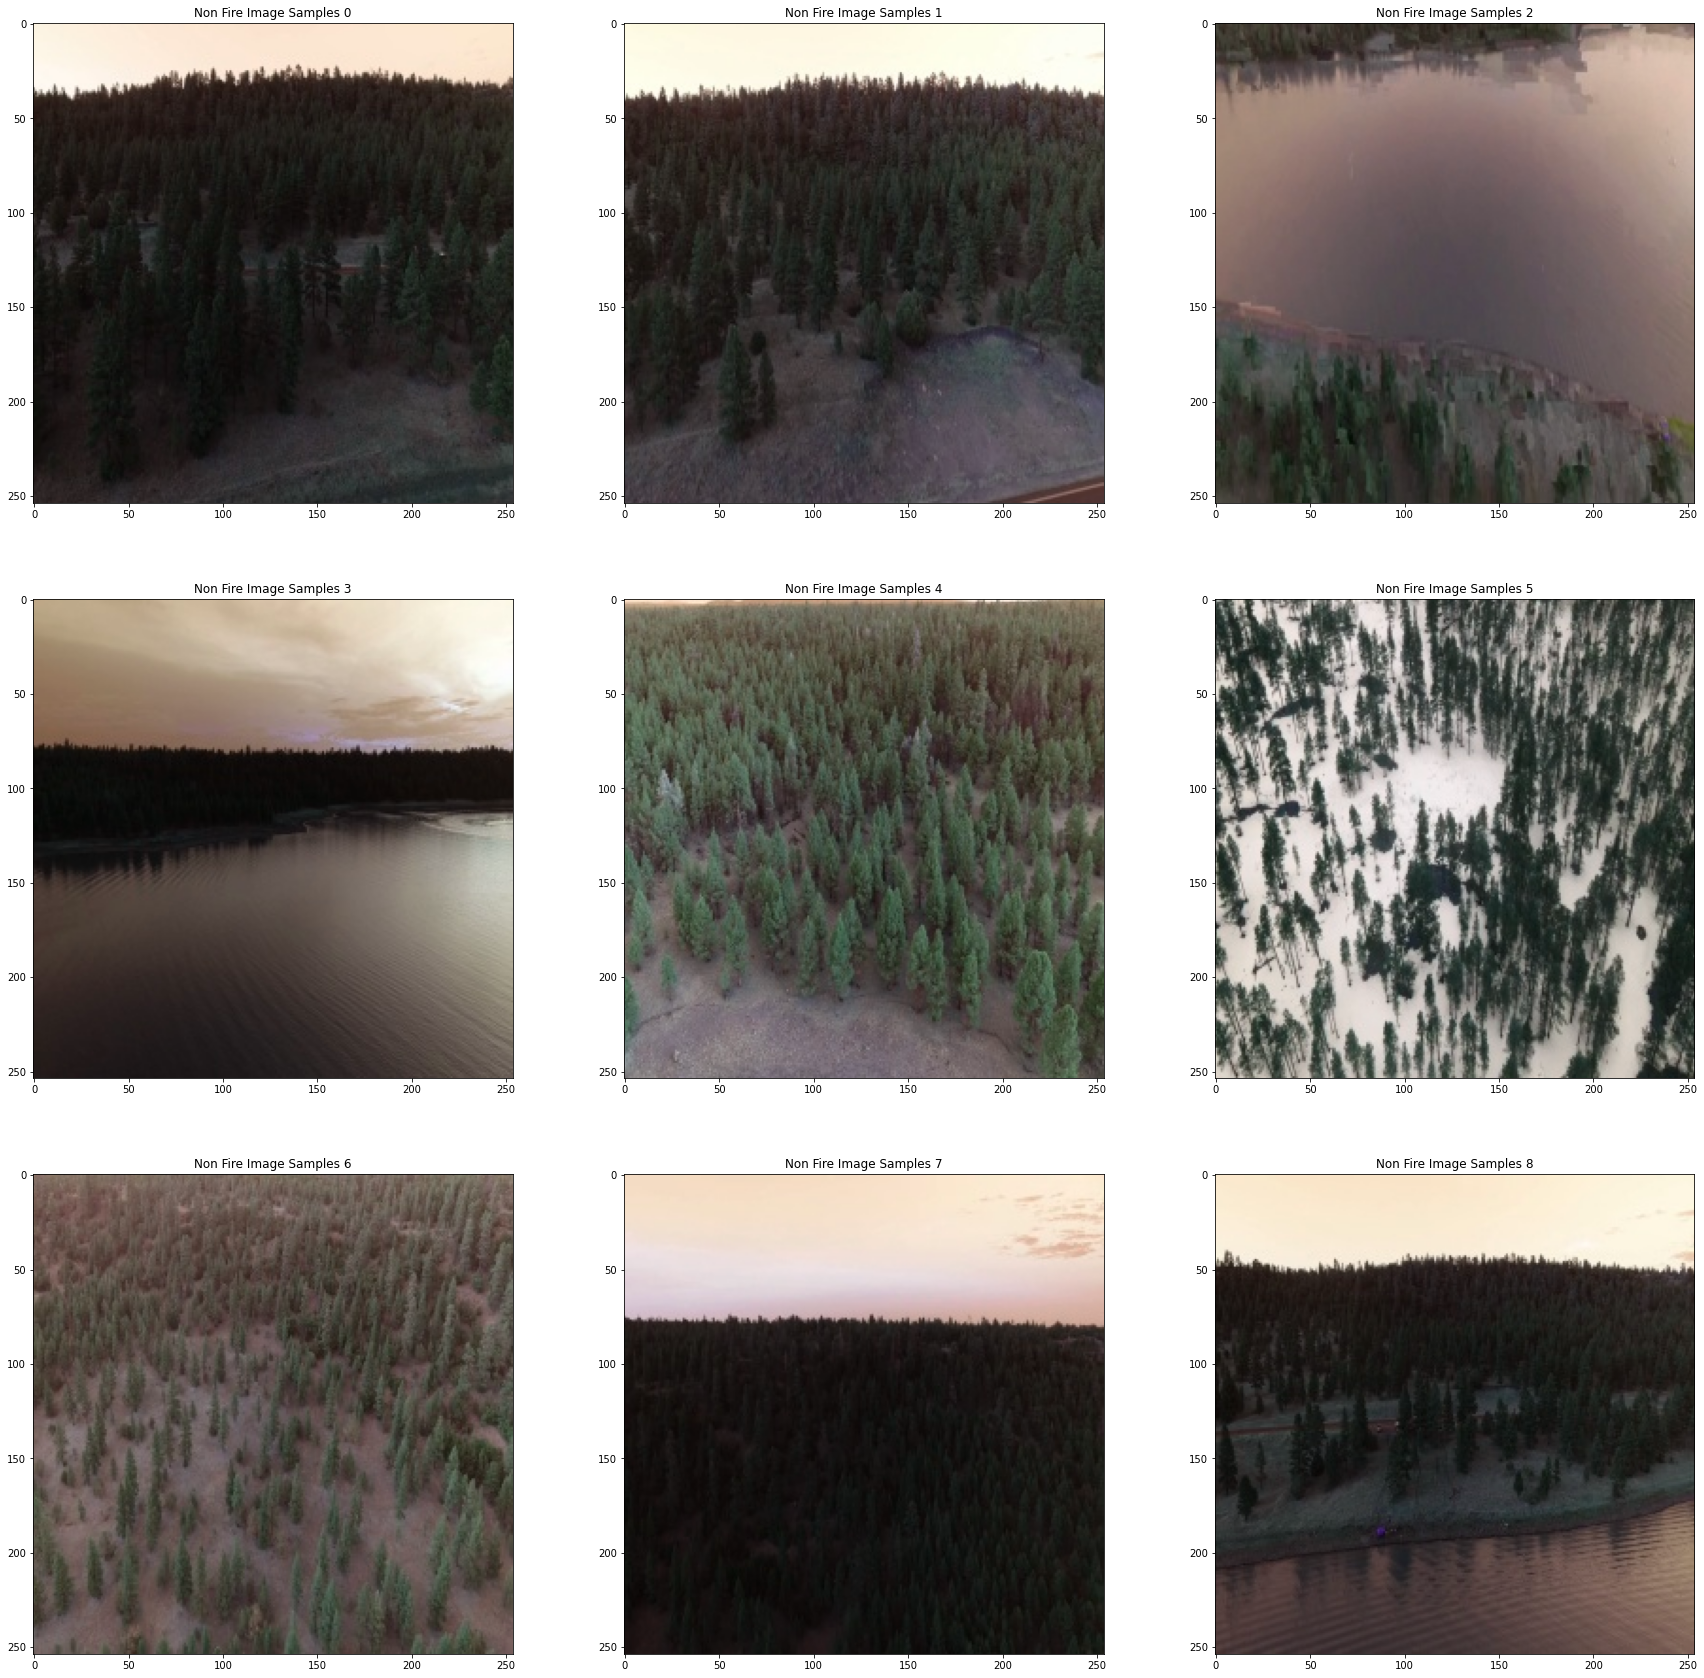

In [43]:
plt.subplots(3,3,figsize= (30,30))
for i in range(len(idx)):
    plt.subplot(3,3,(i+1))
    plt.title("Non Fire Image Samples "+ str(i))
    plt.imshow(X[Train_NF_labels[0][idx[i]]])

In [44]:
# Selecting 9 fire image samples at random
idx2 = np.random.choice(len(Train_F_labels[0]), size=9, replace=False)

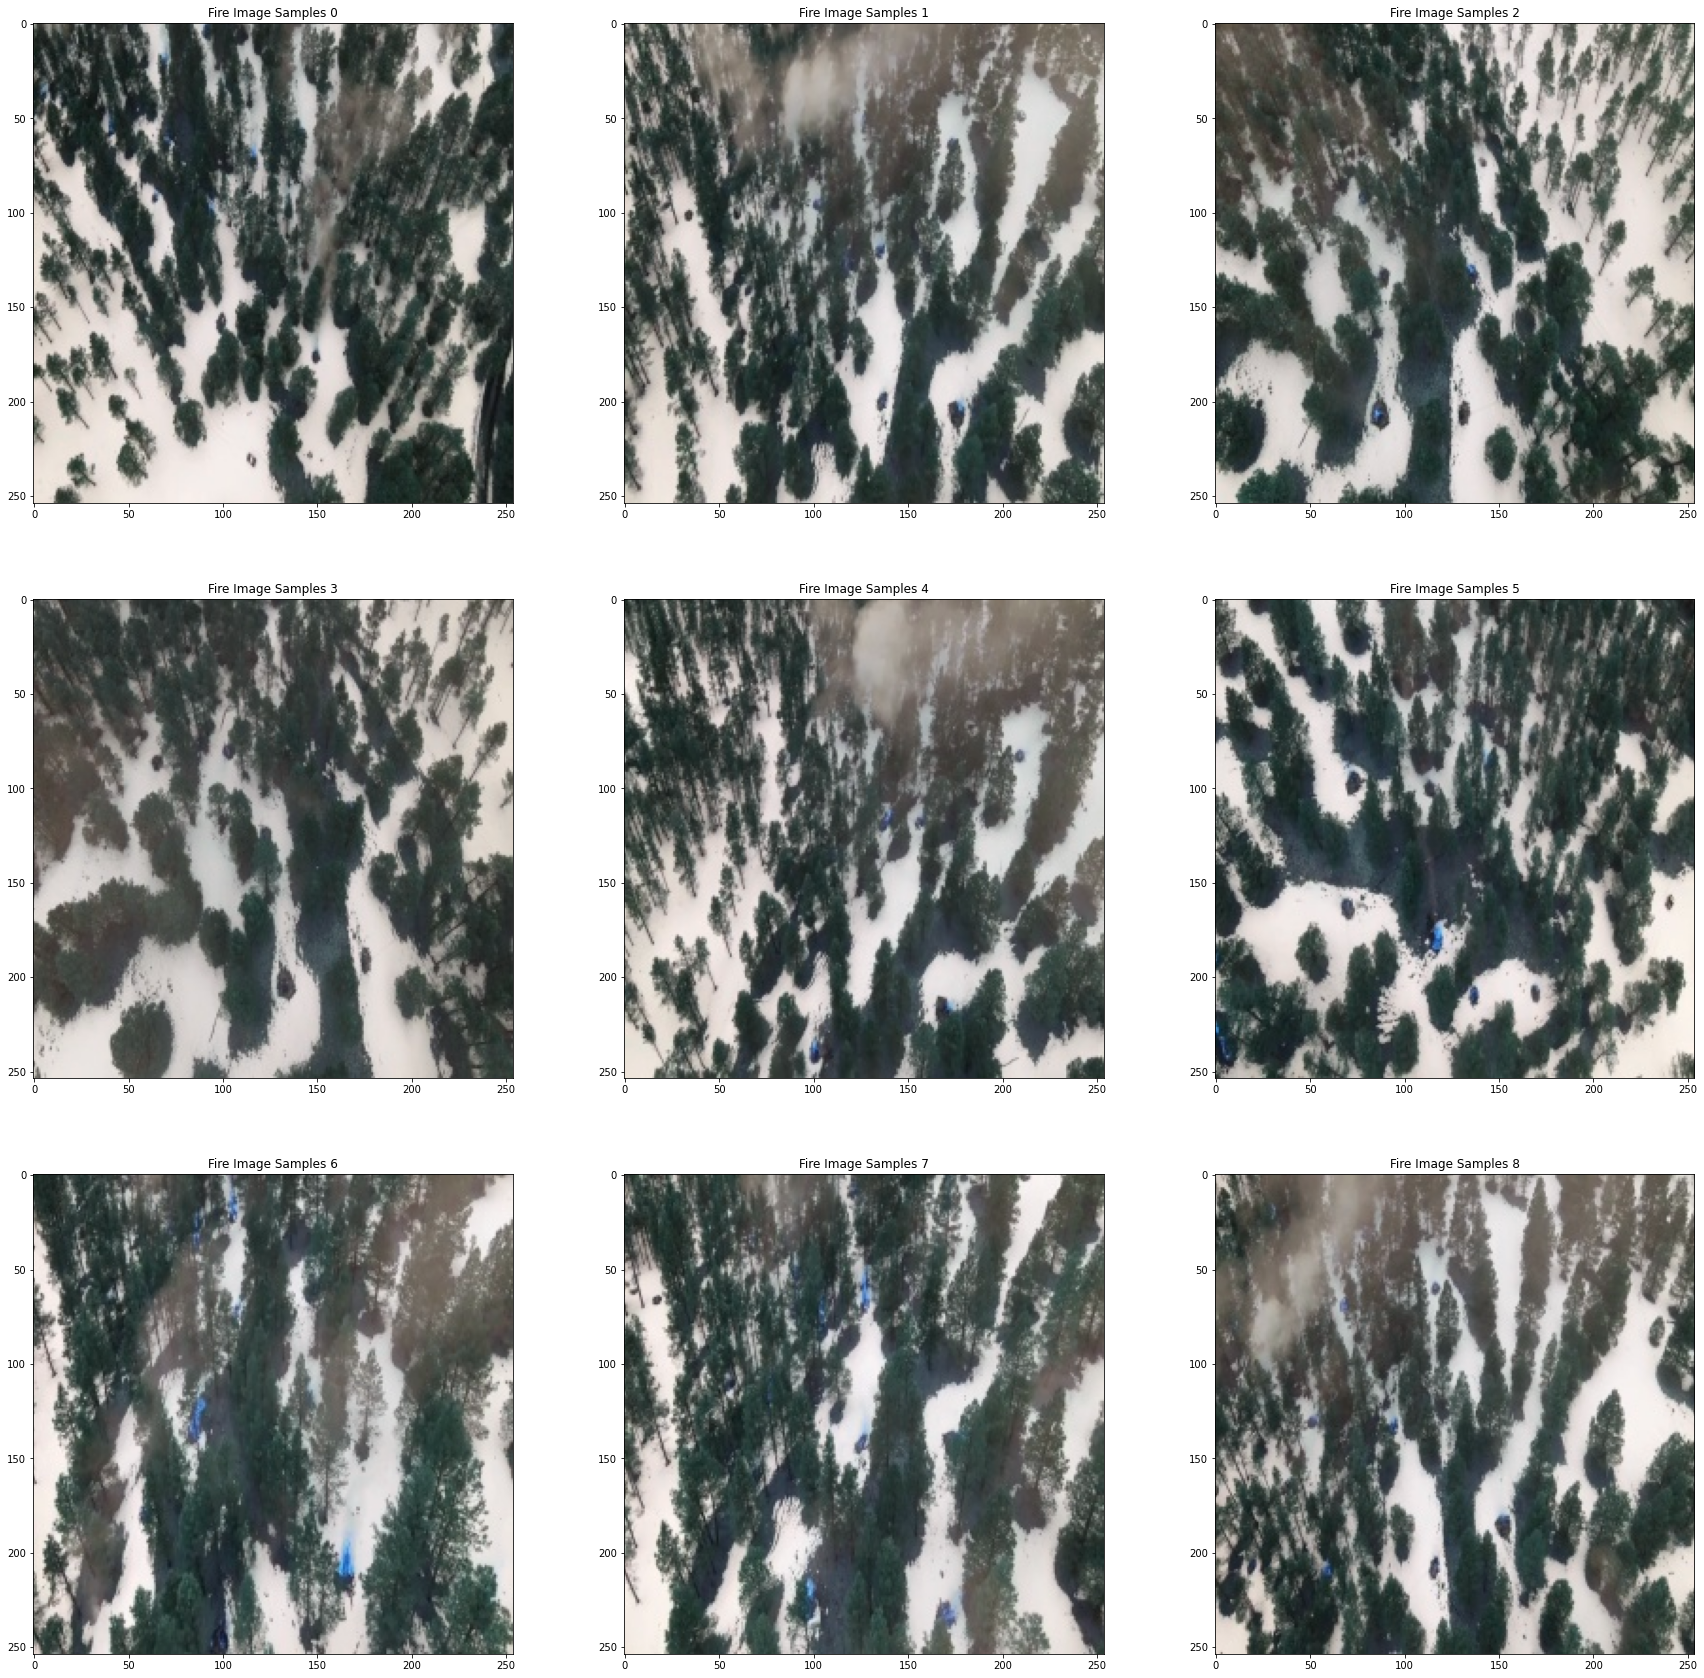

In [45]:
plt.subplots(3,3,figsize= (30,30))
for i in range(len(idx2)):
    plt.subplot(3,3,i+1)
    plt.title("Fire Image Samples "+ str(i))
    plt.imshow(X[Train_F_labels[0][idx2[i]]])

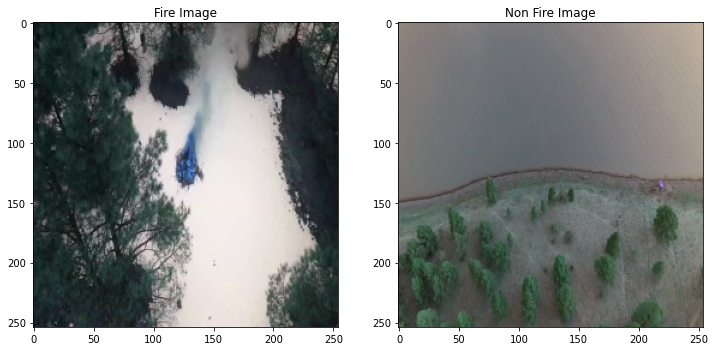

In [49]:
fire_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/train/Training/Fire/resized_frame0.jpg")
plt.subplots(1,2,figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Fire Image")
plt.imshow(fire_image)
non_fire_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/train/Training/No_Fire/lake_resized_lake_frame0.jpg")
plt.subplot(1,2,2)
plt.title("Non Fire Image")
plt.imshow(non_fire_image)

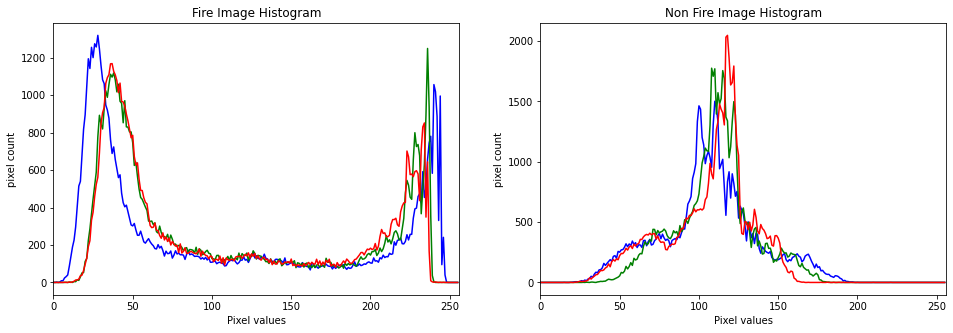

In [50]:
color = ('b','g','r')
plt.subplots(1,2,figsize=(16,5))
for i,col in enumerate(color):
    histr = cv2.calcHist([fire_image],[i],None,[256],[0,256])
    plt.subplot(1,2,1)
    plt.plot(histr,color = col)
    plt.title("Fire Image Histogram")
    plt.xlabel("Pixel values")
    plt.ylabel("pixel count")
    plt.xlim([0,256])
for i,col in enumerate(color):
    histr = cv2.calcHist([non_fire_image],[i],None,[256],[0,256])
    plt.subplot(1,2,2)
    plt.plot(histr,color = col)
    plt.title("Non Fire Image Histogram")
    plt.xlabel("Pixel values")
    plt.ylabel("pixel count")
    plt.xlim([0,256])
plt.show()

In [51]:
print("The max and min pixel values of the fire image is %d & %d" %(np.max(fire_image),np.min(fire_image)) )
print("The max and min pixel values of the fire image in red colour domain is %d & %d" %(np.max(fire_image[:,:,2]),np.min(fire_image[:,:,2])) )

The max and min pixel values of the fire image is 248 & 0
The max and min pixel values of the fire image in red colour domain is 246 & 7


In [52]:
print("The max and min pixel values of the non fire image is %d & %d" %(np.max(non_fire_image),np.min(non_fire_image)) )
print("The max and min pixel values of the non fire image in red colour domain is %d & %d" %(np.max(non_fire_image[:,:,2]),np.min(non_fire_image[:,:,2])) )

The max and min pixel values of the non fire image is 221 & 15
The max and min pixel values of the non fire image in red colour domain is 221 & 19


In [53]:
y_test = np.array(y_test)
Test_NF_labels = np.where(y_test == 1)
Test_F_labels = np.where(y_test == 0)
print("No of test samples for Non fire images", len(Test_NF_labels[0]))
print("No of test samples for fire images", len(Test_F_labels[0]))

No of test samples for Non fire images 3480
No of test samples for fire images 5137


In [54]:
idx3 = np.random.choice(len(Test_NF_labels[0]), size=3, replace=False)

In [55]:
def fire_Segmentation(img):
    # converting image from RGB colour space into ycbcbr colour space
    ybr = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    # calculating the shape of the orgical image
    ny, nx, nc = img.shape
    # claculating mean values of the main Y, Cb and Cr regions of the colour space
    ymean  = ybr[:,:,0].mean()
    cbmean = ybr[:,:,1].mean()
    crmean = ybr[:,:,2].mean()
    P_count = 0
    # Intializing all rule values to zero
    rules = np.zeros(6)
    # defingig Red,Green and Blue dimension values
    blue_reg = 0
    green_reg = 1
    red_reg = 2
    # defing Y, Cb and Cr dimenation values
    y_reg = 0
    cr_reg = 1
    cb_reg = 2
    #Creating a temp zeros array for storing the binary fire segment image
    temp_fire_seg = np.zeros((ny,nx,3))
    for y in range(ny):
        for x in range(nx):
            if (img[y,x,blue_reg] < img[y,x,green_reg] and img[y,x,green_reg] < img[y,x,red_reg]):
                rules[0] = 1
            else: 
                rules[0] = 0
            if ybr[y,x,y_reg] >= ybr[y,x,cb_reg]:
                rules[1] = 1
            else:
                rules[1] = 0
            if ybr[y,x,cr_reg] >= ybr[y,x,cb_reg]:
                rules[2] = 1
            else:
                rules[2] = 0
            if (ybr[y,x,y_reg] >= ymean and ybr[y,x,cb_reg] <= cbmean and ybr[y,x,cr_reg] >= crmean):
                rules[3] = 1
            else:
                rules[3] = 0
            #if abs(ybr[y,x,cb_reg] - ybr[y,x,cr_reg]) >= 75:
                #rules[4] = 1
            #else:
                #rules[4] = 0
            #if ybr[y,x,cb_reg] <= 120 and ybr[y,x,cr_reg] >= 150:
                #rules[5] = 1    
            #else:
                #rules[5] = 0
            #print(rule1,rule2,rule3,rule4,rule5,rule6,rule7)
            if np.sum(rules) == 4:
                P_count += 1 
                temp_fire_seg[y,x,:] = 1
            else:
                continue
    return temp_fire_seg, P_count

In [61]:
# Selecting 9 Non fire image samples at random
idnf = np.random.choice(len(Train_NF_labels[0]), size=250, replace=False)
# Selecting 9 fire image samples at random
idf = np.random.choice(len(Train_F_labels[0]), size=250, replace=False)

In [57]:
No_of_imgs_sus_f = 0
pos = [] 
for i in range(len(idnf)):
    _, f_pix_count = fire_Segmentation(X[Train_NF_labels[0][idnf[i]]])
    if i%50 == 0:
        print("Processed %d images"%(i))
    if f_pix_count > 0:
        No_of_imgs_sus_f += 1
        pos.append(idnf[i])
print("Out of 250 Non fire images suspected flame region found in %d"%(No_of_imgs_sus_f))
    

Processed 0 images
Processed 50 images
Processed 100 images
Processed 150 images
Processed 200 images
Out of 250 Non fire images suspected flame region found in 80
Processed 0 images
Processed 50 images
Processed 100 images
Processed 150 images
Processed 200 images
Out of 250 fire images suspected flame region not found in 0


In [62]:
No_of_imgs_sus_nf = 0
pos2 = []
for i in range(len(idf)):
    _, f_pix_count = fire_Segmentation(X[Train_F_labels[0][idf[i]]])
    if i%50 == 0:
        print("Processed %d images"%(i))
    if f_pix_count == 0:
        No_of_imgs_sus_nf += 1
        pos2.append(idf[i])
print("Out of 250 fire images suspected flame region not found in %d"%(No_of_imgs_sus_nf))

Processed 0 images
Processed 50 images
Processed 100 images
Processed 150 images
Processed 200 images
Out of 250 fire images suspected flame region not found in 1


In [58]:
# Selecting 9 Non fire image samples at random
idnf = np.random.choice(len(Train_NF_labels[0]), size=250, replace=False)
# Selecting 9 fire image samples at random
idf = np.random.choice(len(Train_F_labels[0]), size=250, replace=False)


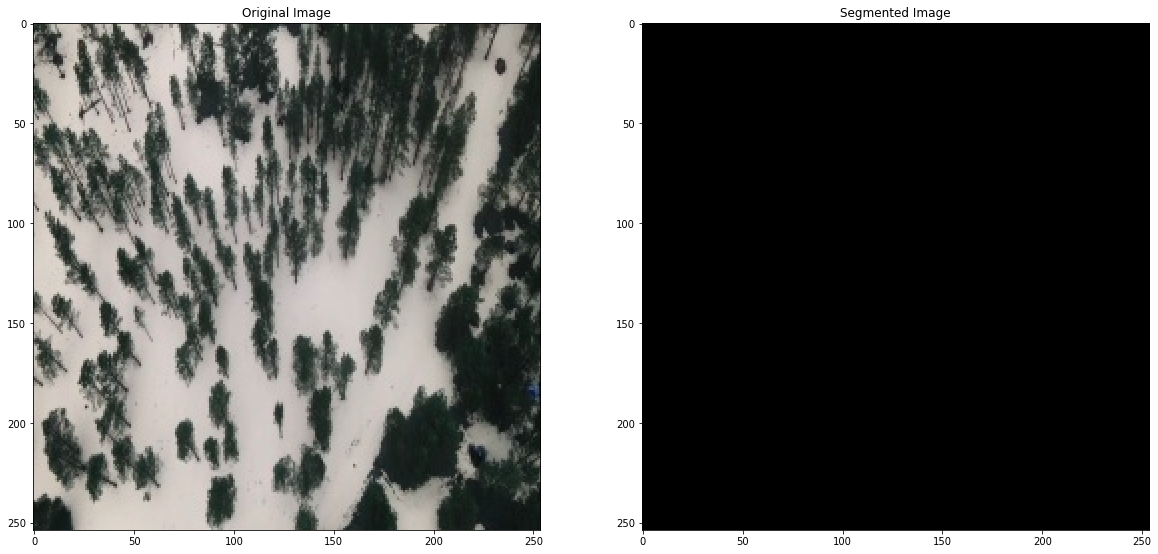

In [63]:
temp_images = []
plt.subplots(1,2,figsize= (20,30))
for i in range(1):
    temp_img , temp_pixels = fire_Segmentation(X[Train_F_labels[0][pos2[i]]])
    plt.subplot(1,2,(i*2+1))
    plt.imshow(X[Train_F_labels[0][pos2[i]]])
    plt.title("Original Image")
    plt.subplot(1,2,(i*2+2))
    plt.imshow(temp_img)
    plt.title("Segmented Image")


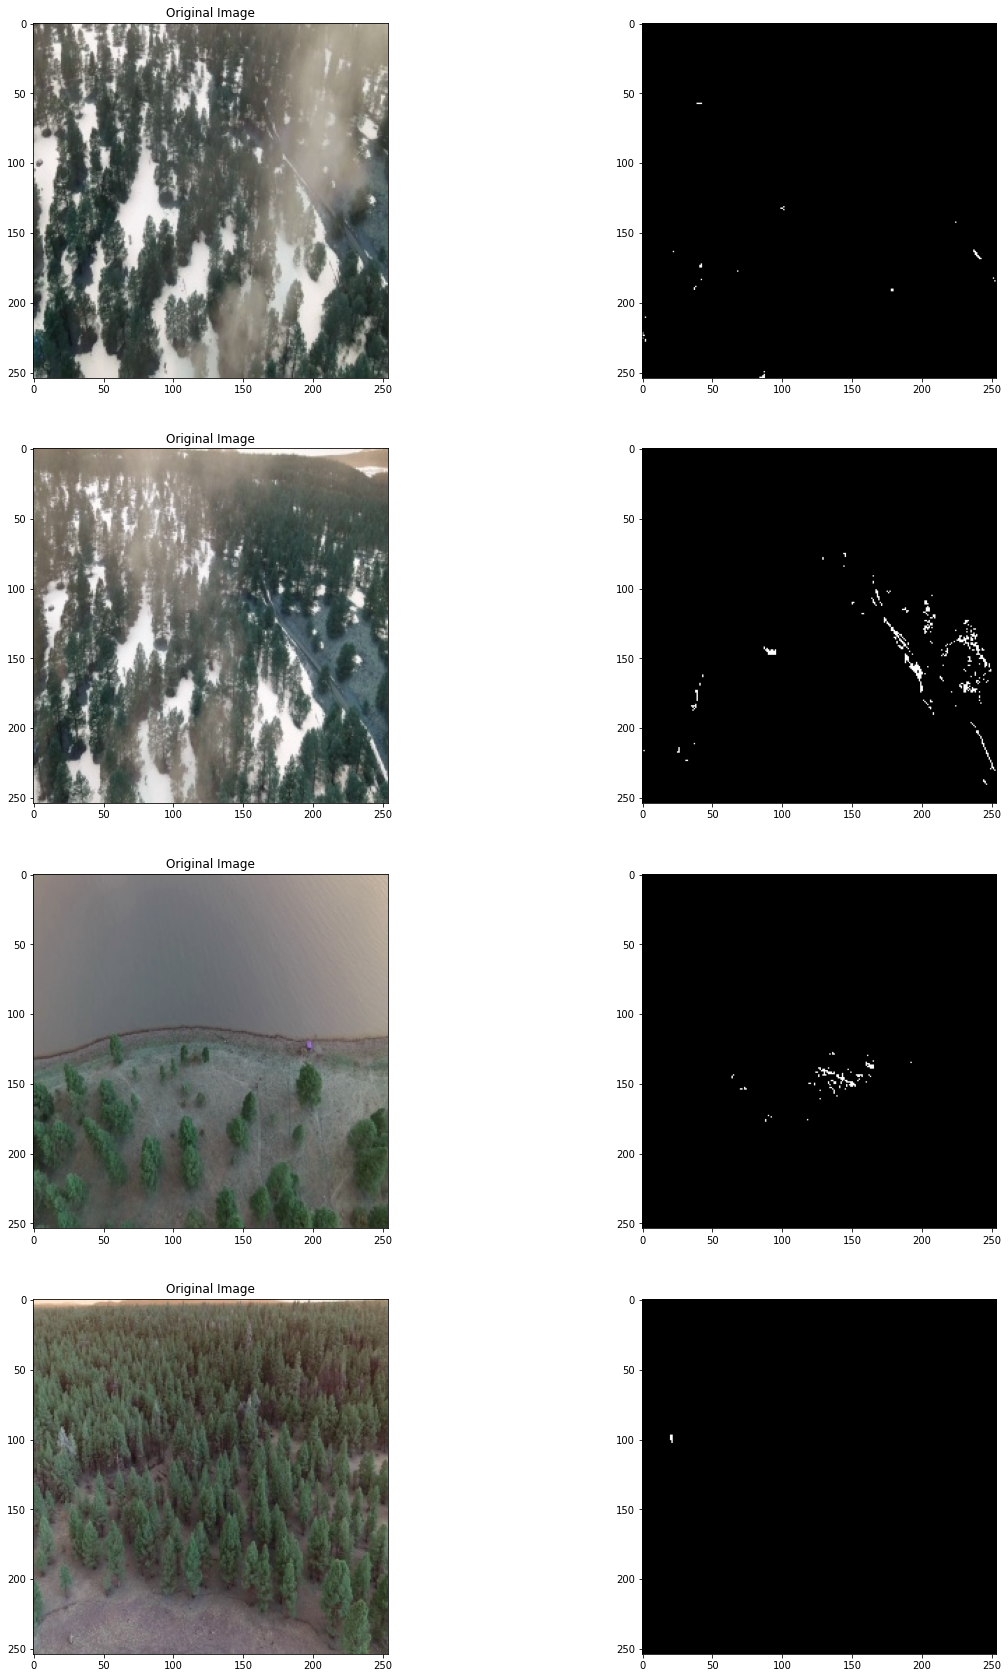

In [60]:
plt.subplots(4,2,figsize=(20,30))
for i in range(4):
    temp_img , temp_pixels = fire_Segmentation(X[Train_NF_labels[0][pos[i]]])
    plt.subplot(4,2,((i)*2+1))
    plt.imshow(X[Train_NF_labels[0][pos[i]]])
    plt.title("Original Image")
    plt.subplot(4,2,((i)*2+2))
    plt.imshow(temp_img)